# Mass Transfer (MT)
March 17th, 2025
Data analysis by Alex Quemel, Rahil Shaik, Sneha Kancharla, and Ethan Mibu

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from scipy.stats import linregress
import math
import warnings
warnings.filterwarnings('ignore')

### Reading in Data from .csv

In [131]:
df_mass = pd.read_csv("data/mass_data_processed.csv")
df_anemometer = pd.read_csv("data/anemometer_data_processed.csv")
df_tc = pd.read_csv("data/tc_data_processed.csv")

In [132]:
df_mass

,temperature,time_min,mass,time_sec,mass_kg,delta_mass
0,140,0,80,0,0.080,NaN
1,140,3,72,180,0.072,-0.008
2,140,6,66,360,0.066,-0.006
3,140,9,60,540,0.060,-0.006
4,140,12,56,720,0.056,-0.004
5,140,15,52,900,0.052,-0.004
6,140,18,49,1080,0.049,-0.003
7,140,21,46,1260,0.046,-0.003
8,140,24,43,1440,0.043,-0.003
9,133,0,31,0,0.031,NaN


In [133]:
df_anemometer

,heater_temp,distance,relative_humidity,air_velocity,temperature_ane
0,140,4,25.3,420.0,84.2
1,140,8,25.3,NaN,84.2
2,140,12,25.3,322.0,84.2
3,140,16,25.3,NaN,84.2
4,140,20,25.3,410.0,84.2
5,133,4,27.7,250.0,81.2
6,133,8,27.7,NaN,81.2
7,133,12,27.7,190.0,81.2
8,133,16,27.7,NaN,81.2
9,133,20,27.7,334.0,81.2


In [134]:
df_tc

,heater_temp,TC1,TC2,TC3,TC4
0,140,122.1,67.5,90.3,76.1
1,133,118.5,71.9,89.4,78.9
2,128,115.0,72.4,88.4,76.4
3,123,110.1,71.8,84.3,73.8


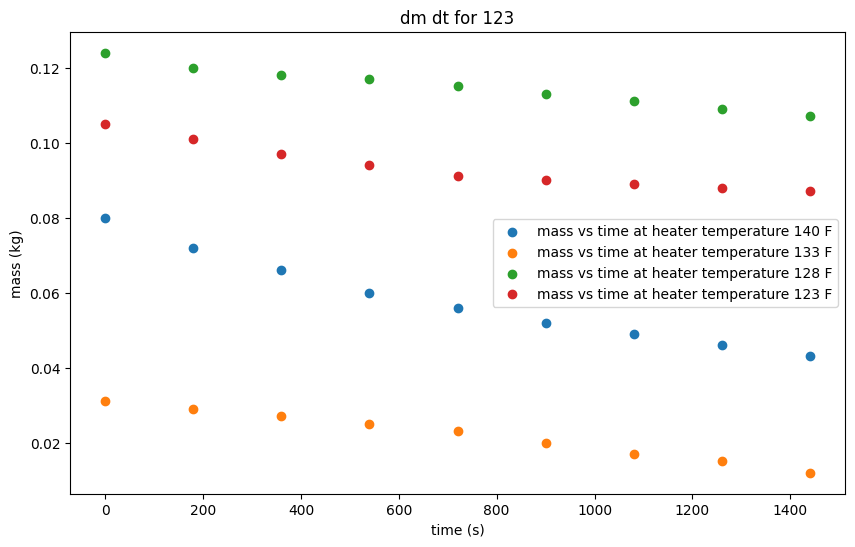

In [135]:
plt.figure(figsize=(10,6))

for temp in df_mass["temperature"].unique():    
    plt.scatter(df_mass.query("temperature == @temp")["time_sec"], df_mass.query("temperature == @temp")["mass_kg"], label=f"mass vs time at heater temperature {temp} F")
    plt.title("dm dt for {}".format(temp))
    plt.xlabel("time (s)")
    plt.ylabel("mass (kg)")
    plt.legend()

## Analysis Question 1
Calculate measured evaporation rates as mass fluxes using units of kg H2O/m²·s.

In [136]:
df_mass

,temperature,time_min,mass,time_sec,mass_kg,delta_mass
0,140,0,80,0,0.080,NaN
1,140,3,72,180,0.072,-0.008
2,140,6,66,360,0.066,-0.006
3,140,9,60,540,0.060,-0.006
4,140,12,56,720,0.056,-0.004
5,140,15,52,900,0.052,-0.004
6,140,18,49,1080,0.049,-0.003
7,140,21,46,1260,0.046,-0.003
8,140,24,43,1440,0.043,-0.003
9,133,0,31,0,0.031,NaN


In [137]:
area_tray = 0.555 * 0.200 # m^2
time_elapsed = 3 * 60 # s
df_mass["mass_flux"] = abs(df_mass["delta_mass"]) / (area_tray * time_elapsed)
df_mass

,temperature,time_min,mass,time_sec,mass_kg,delta_mass,mass_flux
0,140,0,80,0,0.080,NaN,NaN
1,140,3,72,180,0.072,-0.008,0.00040
2,140,6,66,360,0.066,-0.006,0.00030
3,140,9,60,540,0.060,-0.006,0.00030
4,140,12,56,720,0.056,-0.004,0.00020
5,140,15,52,900,0.052,-0.004,0.00020
6,140,18,49,1080,0.049,-0.003,0.00015
7,140,21,46,1260,0.046,-0.003,0.00015
8,140,24,43,1440,0.043,-0.003,0.00015
9,133,0,31,0,0.031,NaN,NaN


## Analysis Question 2
Use Eqs. (5) and (6) and appropriate fluid properties to calculate an average for the concentration and the temperature gradients at the evaporating surface normalized along the length of the entire plate (ignoring at this point that the gradients are functions of position along the length of the pan).

$$
N_{A0} \Delta H_{vap} = k_{air} (\frac{dT}{dz})_0 \ \text{(5)}
$$

Using equation 5 for solving temperature gradient

NOTE: Update k to be k_air based on temperature of film

In [138]:
delta_H_vap = 2450 # J / g
k_air = 0.02624 # J/m·s·K
k_water = 0.6 # J/m·s·K

df_mass["dT_dz_0"] = (df_mass["mass_flux"] * delta_H_vap) / k_water # K / s

In [139]:
df_mass

,temperature,time_min,mass,time_sec,mass_kg,delta_mass,mass_flux,dT_dz_0
0,140,0,80,0,0.080,NaN,NaN,NaN
1,140,3,72,180,0.072,-0.008,0.00040,1.634968
2,140,6,66,360,0.066,-0.006,0.00030,1.226226
3,140,9,60,540,0.060,-0.006,0.00030,1.226226
4,140,12,56,720,0.056,-0.004,0.00020,0.817484
5,140,15,52,900,0.052,-0.004,0.00020,0.817484
6,140,18,49,1080,0.049,-0.003,0.00015,0.613113
7,140,21,46,1260,0.046,-0.003,0.00015,0.613113
8,140,24,43,1440,0.043,-0.003,0.00015,0.613113
9,133,0,31,0,0.031,NaN,NaN,NaN


We can use equation 3 to substitute into the LHS of equation 6

$$
N_A = \frac{-cD_{AB}}{1-x_A} \nabla x_A \ \text{(3)}
$$

$$
-\frac{cD_{AB}}{1-x_{A0}} (\frac{dx_A}{dz})_0 = \frac{k_{air}}{\Delta H_{vap}} (\frac{dT}{dz})_0 \ \text{(6)}
$$

At the interface we have

$$
N_A = \frac{D_{AB}}{1-x_{A0}} \nabla c_A
$$

Then, we can solve for concentration gradient as

$$
\nabla c_A = \frac{N_A}{\frac{D_{AB}}{1-x_{A0}}}
$$

NOTE: get diffusivity from table based on film temp and pressure. using equation 3, move c into grad x_a and solve for x_a0 using antoine's equation

We will start by computing x_A0 with Antoine's equation below using thermocouple measurements at the water surface

$$
x_{A0} = \frac{\text{exp}(18.3036 - \frac{3816.44}{T - 46.13})}{760 P}
$$

In [140]:
def to_C(farenheit):
    return (farenheit - 32) * (5/9)

df_tc["TC1_C"] = df_tc["TC1"].apply(to_C)
df_tc["TC2_C"] = df_tc["TC2"].apply(to_C)
df_tc["TC3_C"] = df_tc["TC3"].apply(to_C)
df_tc["TC4_C"] = df_tc["TC4"].apply(to_C)

In [141]:
def to_K(celsius):
    return celsius + 273.15

df_tc["TC1_K"] = df_tc["TC1_C"].apply(to_K)
df_tc["TC2_K"] = df_tc["TC2_C"].apply(to_K)
df_tc["TC3_K"] = df_tc["TC3_C"].apply(to_K)
df_tc["TC4_K"] = df_tc["TC4_C"].apply(to_K)

Using diffusivity of water (A) in air (B) at 298 Kelvin and assuming atmospheric pressure (1 atm = 101325 Pa)

**NOTE: potentially update diffusivity to not be for 298 K**

In [151]:
P = 101325 # Pa
P_atm = 1 # atm
D_AB = 2.634 / P # m^2 / s

We take an average of water measuring thermocouples (TC2 and TC4) to get the surface temperature of water

In [148]:
df_tc["surf_temp_avg_K"] = (df_tc["TC2_K"] + df_tc["TC4_K"]) / 2

In [152]:
df_tc["x_A0"] = np.exp(18.3036 - (3816.44 / (df_tc["surf_temp_avg_K"] - 46.13))) / (760 * P_atm)

In [153]:
df_tc

,heater_temp,TC1,TC2,TC3,TC4,TC1_C,TC2_C,TC3_C,TC4_C,TC1_K,TC2_K,TC3_K,TC4_K,surf_temp_avg_K,x_A0
0,140,122.1,67.5,90.3,76.1,50.055556,19.722222,32.388889,24.500000,323.205556,292.872222,305.538889,297.650000,295.261111,0.026024
1,133,118.5,71.9,89.4,78.9,48.055556,22.166667,31.888889,26.055556,321.205556,295.316667,305.038889,299.205556,297.261111,0.029401
2,128,115.0,72.4,88.4,76.4,46.111111,22.444444,31.333333,24.666667,319.261111,295.594444,304.483333,297.816667,296.705556,0.028427
3,123,110.1,71.8,84.3,73.8,43.388889,22.111111,29.055556,23.222222,316.538889,295.261111,302.205556,296.372222,295.816667,0.026927


Adding x_A0 to df_mass using merge on temperature

In [ ]:
df_mass = df_mass.merge(df_tc[["heater_temp", "x_A0"]], left_on="temperature", right_on="heater_temp", how="left")
df_mass.drop(columns=["heater_temp"], inplace=True)

$$
\nabla c_A = \frac{N_A}{\frac{D_{AB}}{1-x_{A0}}}
$$

In [158]:
water_molar_mass = 18.01528 / 1000 # kg / mol
df_mass["mole_flux"] = df_mass["mass_flux"] * (1 / water_molar_mass)

In [165]:
df_mass["conc_gradient"] = (df_mass["mole_flux"] * (1 - df_mass["x_A0"])) / D_AB

**NOTE: revisit concentration gradient values, they are hella high**

In [166]:
df_mass

,temperature,time_min,mass,time_sec,mass_kg,delta_mass,mass_flux,dT_dz_0,x_A0,mole_flux,conc_gradient
0,140,0,80,0,0.080,NaN,NaN,NaN,0.026024,NaN,NaN
1,140,3,72,180,0.072,-0.008,0.00040,1.634968,0.026024,0.022226,832.726533
2,140,6,66,360,0.066,-0.006,0.00030,1.226226,0.026024,0.016669,624.544900
3,140,9,60,540,0.060,-0.006,0.00030,1.226226,0.026024,0.016669,624.544900
4,140,12,56,720,0.056,-0.004,0.00020,0.817484,0.026024,0.011113,416.363266
5,140,15,52,900,0.052,-0.004,0.00020,0.817484,0.026024,0.011113,416.363266
6,140,18,49,1080,0.049,-0.003,0.00015,0.613113,0.026024,0.008335,312.272450
7,140,21,46,1260,0.046,-0.003,0.00015,0.613113,0.026024,0.008335,312.272450
8,140,24,43,1440,0.043,-0.003,0.00015,0.613113,0.026024,0.008335,312.272450
9,133,0,31,0,0.031,NaN,NaN,NaN,0.029401,NaN,NaN


## Analysis Question 3
Using the gradients calculated above, estimate the average thicknesses of the concentration and thermal boundary layers by assuming that both the concentration and the temperature profiles are linear starting at the interface value and ending at the bulk flow values at the top boundary. Which boundary-layer thickness is larger? Is the relationship between the two boundary layer thicknesses as expected? How do the average boundary layer thicknesses scale with velocity? Is this as expected? Why or why not?

In [ ]:
# Given or assumed experimental conditions
T_surface = 310  # K (Example: Water surface temperature)
T_bulk = 300  # K (Example: Bulk air temperature)
xA_surface = 0.03  # Water vapor mole fraction at surface (Example from Antoine Equation)
xA_bulk = 0.005  # Water vapor mole fraction in bulk air (Example from humidity data)

# Compute temperature and concentration differences
delta_T = T_surface - T_bulk  # Temperature difference (K)
delta_xA = xA_surface - xA_bulk  # Mole fraction difference

# Compute boundary layer thicknesses
delta_T_layer = delta_T / dT_dy  # Thermal boundary layer thickness (m)
delta_C_layer = delta_xA / dxA_dy  # Concentration boundary layer thickness (m)

# Organize results
df_results = pd.DataFrame({
    'Air Velocity (m/s)': air_velocity,
    'Thermal Boundary Layer δ_T (m)': delta_T_layer,
    'Concentration Boundary Layer δ_C (m)': delta_C_layer
})

# Display results
tools.display_dataframe_to_user(name="Boundary Layer Thicknesses", dataframe=df_results)

# Plot boundary layer thickness vs velocity
plt.figure(figsize=(8, 6))
plt.plot(air_velocity, delta_T_layer, marker='o', linestyle='-', label='Thermal Boundary Layer (δ_T)')
plt.plot(air_velocity, delta_C_layer, marker='s', linestyle='-', label='Concentration Boundary Layer (δ_C)', color='r')
plt.xlabel('Air Velocity (m/s)')
plt.ylabel('Boundary Layer Thickness (m)')
plt.title('Boundary Layer Thickness vs Air Velocity')
plt.legend()
plt.grid(True)
plt.show()

# Check scaling with velocity using linear regression on log-log plot
log_V = np.log(air_velocity)
log_delta_T = np.log(delta_T_layer)
log_delta_C = np.log(delta_C_layer)

slope_T, intercept_T, _, _, _ = linregress(log_V, log_delta_T)
slope_C, intercept_C, _, _, _ = linregress(log_V, log_delta_C)

print(f"Scaling relationship for δ_T: δ_T ∝ V^({slope_T:.2f})")
print(f"Scaling relationship for δ_C: δ_C ∝ V^({slope_C:.2f})")


## Analysis Question 4
How does km, the average mass transfer coefficient along the length of the plate, vary with the velocity of the gas stream?  Is the scaling of km with velocity what you would expect?  Why or why not?  Is this scaling consistent with the laminar/turbulent nature of the air flow in the experiment, as calculated from the Reynolds number? That is to say, the Reynolds number controls the laminar/turbulent nature of flow, but this nature of the flow affects the scaling of km with velocity. Is there self-consistency between this scaling and the Reynolds number?

In [ ]:
# Compute mass transfer coefficient from experimental data
km_exp = J_A / delta_xA  # Experimental km (m/s)

# Compute mass transfer coefficient from film theory
km_film = D_AB / delta_C_layer  # Film theory km (m/s)

# Compute Reynolds number
Re = (rho_air * air_velocity * L_char) / mu_air  # Reynolds number

# Organize results into a DataFrame
df_results = pd.DataFrame({
    'Air Velocity (m/s)': air_velocity,
    'Reynolds Number': Re,
    'Experimental km (m/s)': km_exp,
    'Film Theory km (m/s)': km_film
})

# Display results
tools.display_dataframe_to_user(name="Mass Transfer Coefficient Analysis", dataframe=df_results)

# Plot km vs air velocity (log-log plot)
plt.figure(figsize=(8, 6))
plt.loglog(air_velocity, km_exp, marker='o', linestyle='-', label='Experimental km')
plt.loglog(air_velocity, km_film, marker='s', linestyle='--', label='Film Theory km', color='r')
plt.xlabel('Air Velocity (m/s)')
plt.ylabel('Mass Transfer Coefficient km (m/s)')
plt.title('Mass Transfer Coefficient vs Air Velocity')
plt.legend()
plt.grid(True)
plt.show()

# Perform linear regression for scaling (log-log)
log_V = np.log(air_velocity)
log_km_exp = np.log(km_exp)
log_km_film = np.log(km_film)

slope_exp, intercept_exp, _, _, _ = linregress(log_V, log_km_exp)
slope_film, intercept_film, _, _, _ = linregress(log_V, log_km_film)

print(f"Experimental scaling: km ∝ V^({slope_exp:.2f})")
print(f"Film theory scaling: km ∝ V^({slope_film:.2f})")